KNN Implementation

Generate classification data

In [4]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.datasets._samples_generator import make_blobs
X_train, Y_train = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=6, random_state=11)

Plot the data

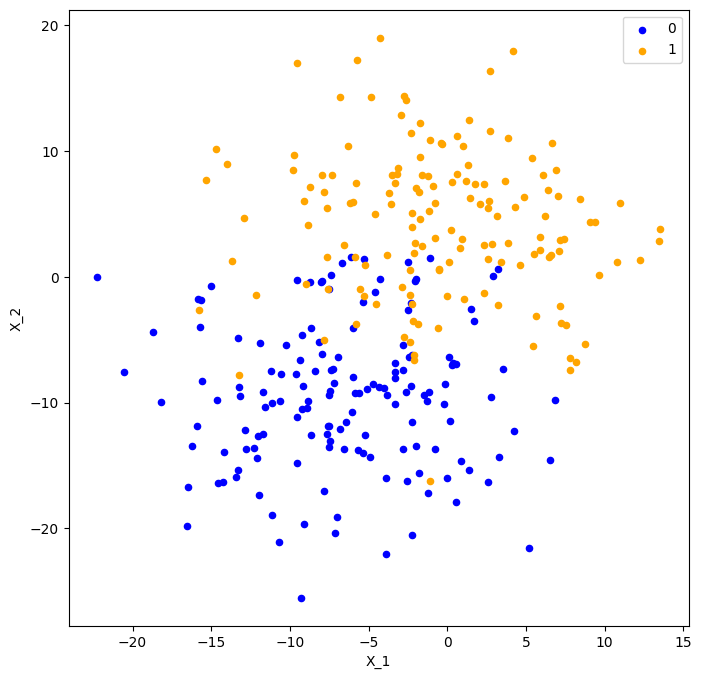

In [5]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame 

df = DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=Y_train))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots(figsize=(8,8))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

Feature scaling

In [7]:
def normalize(X):
    x1_min = min(X_train[:,0])
    x1_max = max(X_train[:,0])
    
    f = lambda x: (x - x1_min)/(x1_max - x1_min)
    X[:,0] = f(X[:,0])

    x2_min = min(X_train[:,1])
    x2_max = max(X_train[:,1])
    
    f = lambda x: (x - x2_min)/(x2_max - x2_min)
    X[:,1] = f(X[:,1])
    
    return X

In [8]:
X = normalize(X_train)
print(X[0:5])

[[0.59987983 0.70438379]
 [0.22476575 0.2065585 ]
 [0.42582798 0.14400726]
 [0.60646637 0.58589566]
 [0.35477231 0.56762558]]


Classification with KNN

In [9]:
from knn import KNN

k = 3
clf = KNN(k=k)
clf.fit(X, Y_train)
predictions = clf.predict(X)
print("Predictions", predictions)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_train, predictions)
print("Accuracy:", accuracy)


Predictions [1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0
 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0
 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1
 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1
 0 1 0 0]
Accuracy: 0.93


In [10]:
new_points = np.array([[-10, -10],
                      [0, 10],
                      [-15, 10],
                      [5, -2]])

new_points = normalize(new_points)

k = 4
clf = KNN(k=k)
clf.fit(X, Y_train)

predictions = clf.predict(new_points)
print("Predictions:", predictions)

Predictions: [0 1 1 0]


In [19]:
from knn import KNNRegressor
k = 3
regressor = KNNRegressor(k=k)
regressor.fit(X, Y_train)
predictions = regressor.predict(X)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_train, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.05


In [20]:
new_points = np.array([[-1, 1],
                      [0, 2],
                      [-3, -2],
                      [3, -3]])
new_points = normalize(new_points)

k = 4
clf = KNNRegressor(k=k)
clf.fit(X, Y_train)

predictions = clf.predict(new_points)
print("Predictions:", predictions)

Predictions: [0.25 1.   0.   0.  ]
